<a href="https://colab.research.google.com/github/rahulnrishi1989/reservoir_workflows/blob/main/ReservoirEngineering_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reserves Analysis and Estimation in Bakken field


# Introduction
The project is a self chosen one to practice Python. Following approach will be used:
Production Datasets for 5 years in Excel were downloaded from https://www.dmr.nd.gov/oilgas/mprindex.asp
1. Datasets will be uploaded to colab working session
2. All the excel files will be converted to CSVs to work with files easily
3. All the CSVs will be combined to 1 consolidated production file
4. The consolidated CSV will be cleaned to ensure quality data is used for the Project

NOTE: Datasets will be custom cleaned as per the objectives of the Project.

# Objectives

The objective of the project is to use Python and perform the following Reserves estimation workflows:

1. Decline Curve Analysis
2. Volumetric Estimation
3. Material Balance
4. Reserves forecasting

##Decline Curve Analysis
Decline Curve Analysis (DCA) is a widely used technique in the oil and gas industry for estimating future production rates and the ultimate recovery of oil and gas wells. It involves analyzing historical production data to forecast future performance and assess the economic viability of a well or field. Here's a detailed overview of Decline Curve Analysis:

Concept: DCA is based on the observation that production rates of oil and gas wells typically decline over time. By analyzing historical production data, DCA aims to model this decline and predict future production.

Purpose: The primary purposes of DCA is to estimate future production rates, calculate the remaining recoverable reserves, evaluate the economic potential of wells, and make informed decisions about field development and investment.

Basic Principle: Over time, the production rate of a well decreases due to the reduction in reservoir pressure, depletion of easily accessible reserves, and other factors. The decline can be characterized by various mathematical models.

Types of Decline Curves
There are several types of decline curves used in DCA, each representing different decline behaviors:

Exponential Decline:

Model: q(t) = q(i) * e^ (-Dt)

Description: In this model, the production rate decreases exponentially over time. This is suitable for wells with a constant decline rate.
Where:
q(t) = production rate at time t
q(i) = initial production rate
D = decline rate
t = time

Hyperbolic Decline:

Description: This model represents a decline that starts quickly and then slows down. It is suitable for wells with a declining rate that decreases over time.
Where:
b = hyperbolic exponent

Harmonic Decline:

Model: q(t)= q(i)/(1+Dt)

Description: The harmonic decline model has a decline rate that slows down more gradually compared to the exponential decline. It is useful for certain types of wells and reservoirs.

Steps in Decline Curve Analysis

1. Collect historical production data, including production rates and cumulative production over time.
2. Choose an appropriate decline curve model based on the characteristics of the well and the production data.
3. Fit the selected decline curve model to the historical production data. This involves estimating parameters like decline rate and initial production rate.
4. Use the fitted model to forecast future production rates and cumulative production. This helps in estimating the remaining recoverable reserves and planning future operations.

Economic Evaluation:

Assess the economic viability of the well or field based on the forecasted production and reserve estimates. This includes calculating metrics like Net Present Value (NPV), Internal Rate of Return (IRR), and payback period.

Uncertainty Analysis:

Analyze the uncertainties associated with the decline curve forecasts. This may involve sensitivity analysis and probabilistic forecasting to account for variations in decline rates and other factors.

Applications:

1. DCA helps in estimating the volume of recoverable reserves, which is crucial for financial reporting and investment decisions.
2. It provides forecasts of future production rates, aiding in operational planning and budgeting.
3. It assists in evaluating the economic potential of wells and fields, guiding decisions on drilling, completions, and field development.
4. DCA helps in managing and optimizing the performance of oil and gas assets throughout their life cycle.

Limitations:

1. DCA assumes that historical production trends will continue, which may not always be the case due to changes in reservoir conditions, operational practices, or external factors.
2. Each decline curve model has its limitations and may not perfectly represent the decline behavior of all wells.

###Import Datasets into colab session
The Datasets were a mix of .csv and .xlsx. Thus, there was Data preprocessing done to convert the .xlsx to .csv and later combine all the .csv into 1 master csv.

In [1]:
import pandas as pd
import os



In [2]:
!pip install pandas openpyxl
# Define the directory containing the files
directory = '/content/sample_data/Python Project-RE'

# List all files in the directory
files = os.listdir(directory)

# Filter out only Excel files (.xlsx or .xls)
excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]

# Loop through the identified Excel files and convert each to CSV
for excel_file in excel_files:
    # Construct the full file path
    file_path = os.path.join(directory, excel_file)

    # Read the Excel file
    df = pd.read_excel(file_path, engine='openpyxl')

    # Define the CSV file name by replacing the .xlsx or .xls extension with .csv
    csv_file = os.path.splitext(excel_file)[0] + '.csv'

    # Save the dataframe as a CSV file
    df.to_csv(os.path.join(directory, csv_file), index=False)

print("Excel files have been converted to CSV.")


Excel files have been converted to CSV.


In [3]:
os.remove(file_path)

In [5]:
#List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

In [6]:
# Create an empty list to hold dataframes
dfs = []

In [7]:
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

In [8]:
# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
# Save the combined dataframe to a single CSV file
combined_df.to_csv(os.path.join(directory, 'combined.csv'), index=False)

In [10]:
df_SOR = pd.read_csv('/content/sample_data/Python Project-RE/combined.csv')

In [11]:
# Remove irrelevant columns
columns_to_remove = ['FileNo', 'Wtr', 'Runs', 'GasSold', 'Lat', 'Long', 'Flared']
# Replace with your column names
df_SOR.drop(columns=columns_to_remove, inplace=True)

In [12]:
combined_csv_file = 'combined.csv'
updated_csv_file = 'combined_updated.csv'
df_SOR.to_csv(os.path.join(directory, updated_csv_file), index=False)
print(f"Updated CSV file saved as {updated_csv_file}")

Updated CSV file saved as combined_updated.csv


In [13]:
column_name = 'Pool'
filter_value = 'BAKKEN'

# Filter the dataframe
filtered_df = df_SOR[df_SOR[column_name] == filter_value]

# Define the output file path
filtered_csv_file = '/content/sample_data/Python Project-RE/filtered_data.csv'

# Save the filtered dataframe to a new CSV file
filtered_df.to_csv(filtered_csv_file, index=False)

print(f"Filtered data saved to {filtered_csv_file}")

Filtered data saved to /content/sample_data/Python Project-RE/filtered_data.csv


In [15]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [18]:
import numpy as np

In [19]:
final_df = pd.read_csv('/content/sample_data/Python Project-RE/Final_data_2019-22_BAKKEN.csv')

In [26]:
final_df['ReportDate'] = pd.to_datetime(final_df['ReportDate'], format='%m/%d/%Y')

# Aggregate production data
# Sum production values across all wells for each date
aggregated_df = final_df.groupby('ReportDate').agg({'Oil': 'sum', 'Gas': 'sum'}).reset_index()

# Calculate cumulative production
aggregated_df['Cumulative_Oil'] = aggregated_df['Oil'].cumsum()
aggregated_df['Cumulative_Gas'] = aggregated_df['Gas'].cumsum()

# Convert 'ReportDate' to datetime if it's not already
if aggregated_df['ReportDate'].dtype == 'object':  # Check if the column is of type object (likely string)
    aggregated_df['ReportDate'] = pd.to_datetime(aggregated_df['ReportDate'])

# Calculate days from the start
aggregated_df['Days_from_start'] = (aggregated_df['ReportDate'] - aggregated_df['ReportDate'].min()).dt.days

aggregated_df.head()

,ReportDate,Oil,Gas,Cumulative_Oil,Cumulative_Gas,Days_from_start
0,2019-01-01,37764382,75362118,37764382,75362118,0
1,2019-02-01,33155311,66438490,70919693,141800608,31
2,2019-03-01,38472455,78699479,109392148,220500087,59
3,2019-04-01,36816954,78038117,146209102,298538204,90
4,2019-05-01,37418404,78061148,183627506,376599352,120


In [27]:
aggregated_df.head(100)

,ReportDate,Oil,Gas,Cumulative_Oil,Cumulative_Gas,Days_from_start
0,2019-01-01,37764382,75362118,37764382,75362118,0
1,2019-02-01,33155311,66438490,70919693,141800608,31
2,2019-03-01,38472455,78699479,109392148,220500087,59
3,2019-04-01,36816954,78038117,146209102,298538204,90
4,2019-05-01,37418404,78061148,183627506,376599352,120
5,2019-06-01,36682074,76441006,220309580,453040358,151
6,2019-07-01,37937649,80790989,258247229,533831347,181
7,2019-08-01,39119933,82889662,297367162,616721009,212
8,2019-09-01,37090325,79026657,334457487,695747666,243
9,2019-10-01,40067352,85100472,374524839,780848138,273


In [28]:
# Decline curve models
def exponential_decline(t, qi, Di):
    return qi * np.exp(-Di * t)

def hyperbolic_decline(t, qi, Di, b):
    return qi / (1 + b * Di * t) ** (1/b)

def harmonic_decline(t, qi, Di):
    return qi / (1 + Di * t)

In [ ]:
# Extract data for fitting
t = aggregated_df['Days_from_start'].values
q_oil = aggregated_df['Oil'].values

# Fit models
initial_guess_exp = [q_oil.max(), 0.01]
initial_guess_hyp = [q_oil.max(), 0.5, 1]

popt_exp_oil, _ = curve_fit(exponential_decline, t, q_oil, p0=initial_guess_exp)
popt_hyp_oil, _ = curve_fit(hyperbolic_decline, t, q_oil, p0=initial_guess_hyp)
popt_har_oil, _ = curve_fit(harmonic_decline, t, q_oil, p0=initial_guess_exp)


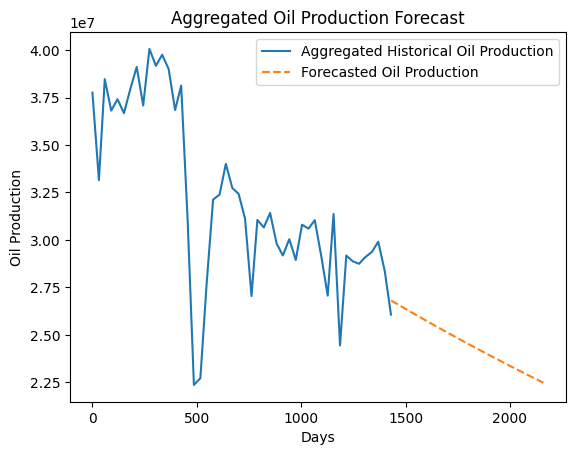

In [30]:
forecast_days = np.arange(t.max() + 1, t.max() + 730 + 1)
oil_forecast = exponential_decline(forecast_days, *popt_exp_oil)

plt.plot(t, q_oil, label='Aggregated Historical Oil Production')
plt.plot(forecast_days, oil_forecast, label='Forecasted Oil Production', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Oil Production')
plt.legend()
plt.title('Aggregated Oil Production Forecast')
plt.show()

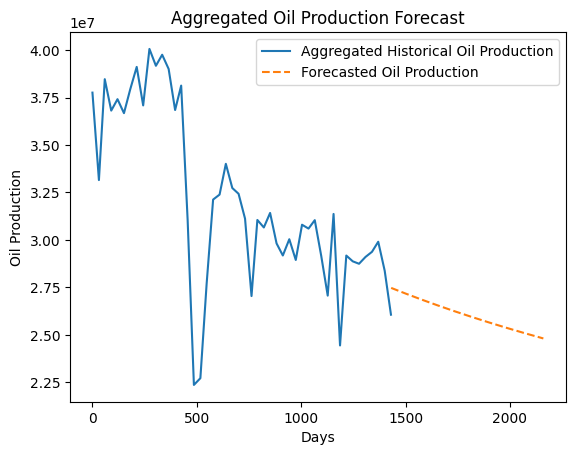

In [37]:
oil_forecast = hyperbolic_decline(forecast_days, *popt_hyp_oil)

plt.plot(t, q_oil, label='Aggregated Historical Oil Production')
plt.plot(forecast_days, oil_forecast, label='Forecasted Oil Production', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Oil Production')
plt.legend()
plt.title('Aggregated Oil Production Forecast')
plt.show()

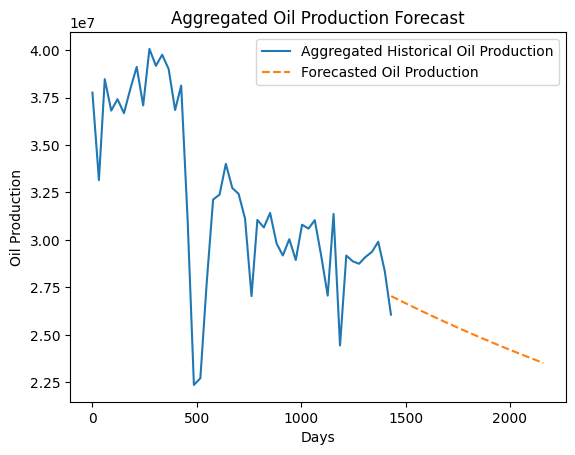

In [33]:
oil_forecast = harmonic_decline(forecast_days, *popt_har_oil)

plt.plot(t, q_oil, label='Aggregated Historical Oil Production')
plt.plot(forecast_days, oil_forecast, label='Forecasted Oil Production', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Oil Production')
plt.legend()
plt.title('Aggregated Oil Production Forecast')
plt.show()